In [1]:
#https://pyastronomy.readthedocs.io/en/latest/pyaslDoc/aslDoc/keplerOrbit.html#keplerorbitpyasl
from __future__ import print_function, division
import numpy as np
from PyAstronomy import pyasl
import matplotlib.pylab as plt

In [2]:
# Instantiate a Keplerian elliptical orbit with
# semi-major axis of 1.3 length units,
# a period of 2 time units, eccentricity of 0.5,
# longitude of ascending node of 70 degrees, an inclination
# of 10 deg, and a periapsis argument of 110 deg.
ke = pyasl.KeplerEllipse(1.3, 2., e=0.5, Omega=70., i=10.0, w=110.0)

In [3]:
# Get a time axis
t = np.linspace(0, 1.9, 200)

#print(t)

In [4]:
# Calculate the orbit position at the given points
# in a Cartesian coordinate system.
pos = ke.xyzPos(t)
print("Shape of output array: ", pos.shape)

Shape of output array:  (200, 3)


In [5]:
# x, y, and z coordinates for 50th time point
print("x, y, z for 50th point: ", pos[50, ::])

x, y, z for 50th point:  [ 1.12522122 -1.03334057 -0.24875952]


In [6]:
# Calculate orbit radius as a function of the
radius = ke.radius(t)
#print(radius)

In [7]:
# Calculate velocity on orbit
vel = ke.xyzVel(t)

In [9]:
# Find the nodes of the orbit (Observer at -z)
ascn, descn = ke.xyzNodes_LOSZ()

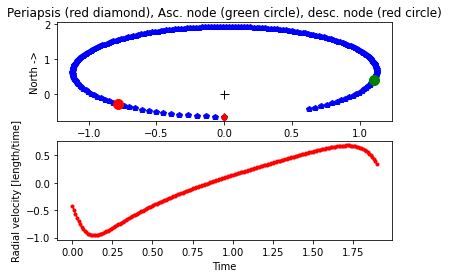

In [10]:
# Plot x and y coordinates of the orbit
plt.subplot(2, 1, 1)
plt.title("Periapsis (red diamond), Asc. node (green circle), desc. node (red circle)")
plt.xlabel("East ->")
plt.ylabel("North ->")
plt.plot([0], [0], 'k+', markersize=9)
plt.plot(pos[::, 1], pos[::, 0], 'bp')
# Point of periapsis
plt.plot([pos[0, 1]], [pos[0, 0]], 'rd')
# Nodes of the orbit
plt.plot([ascn[1]], [ascn[0]], 'go', markersize=10)
plt.plot([descn[1]], [descn[0]], 'ro', markersize=10)
# Plot RV
plt.subplot(2, 1, 2)
plt.xlabel("Time")
plt.ylabel("Radial velocity [length/time]")
plt.plot(t, vel[::, 2], 'r.-')
plt.show()